# Understanding the Churns Behaviour

### Importing the data

In [1]:
# use these links to do so:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


In [59]:
churn = pd.read_csv('Churn.csv')

In [60]:
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### Finding Null values

In [61]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Understanding the data

#### Finding the Value Counts for the columns to understand the data present in each columns

In [62]:
churn.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [63]:
churn.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [64]:
churn.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [65]:
churn.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [66]:
churn.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [67]:
churn.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [68]:
churn.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [69]:
churn.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

### Data Manipulation

#### From the above understandings now dividing the columns into catogories

#### all the catogorical columns are get into on list named catagorical_cols

In [70]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [71]:
columns = churn.columns
catagorical_cols = []
for col in columns:
    if churn[col].value_counts().shape[0] == 2:
        catagorical_cols.append(col)

In [72]:
catagorical_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

#### The required feature columns with multiple catogories are classified into one list named multi_cols

In [73]:
columns = churn.columns
multi_cols = []
for col in columns:
    if (churn[col].value_counts().shape[0] > 2) & (churn[col].value_counts().shape[0] <= 4) :
        multi_cols.append(col)

In [74]:
multi_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

#### Inserting one new column named Churn_modified to convert the Churn label column to numarical column

In [126]:
churn.insert(21, column = "Churn_modified" ,value = churn['Churn'].apply(lambda x: '1' if x == 'Yes' else '0'))


In [127]:
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_modified
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,1


### Data Visualization

### Performing Data Visualization to the catagorical_cols list in dataset to find the patterns present in the feature columns(Independent variables)

In [155]:
catagorical_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

#### Finding the counts of the gender column

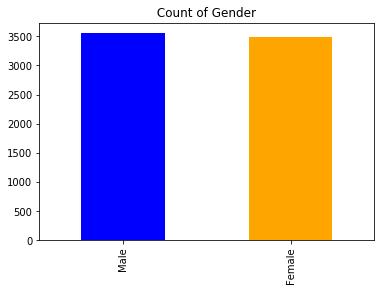

In [133]:
churn['gender'].value_counts().plot(kind='bar',title=' Count of Gender ',color=['blue','orange'])

#### Finding the counts of the SeniorCitizen column

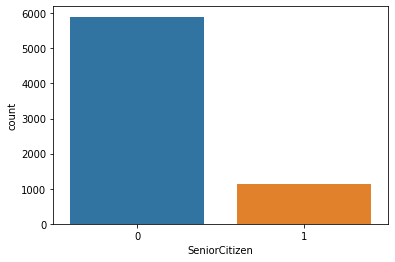

In [145]:
sns.countplot("SeniorCitizen", data=churn)


#### Finding the counts of the Partner column

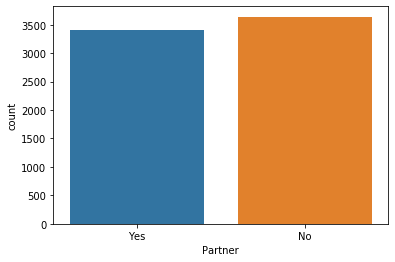

In [146]:
sns.countplot("Partner", data=churn)

#### Finding the counts of the Dependents column

In [148]:
import matplotlib.pyplot as plt

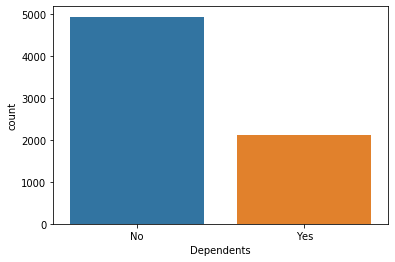

In [152]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot("Dependents", ax=ax, data=churn)

#### Finding the counts of the PhoneService column

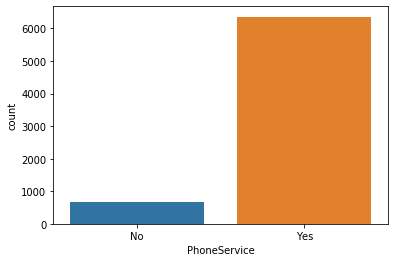

In [156]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot("PhoneService", ax=ax, data=churn)

#### Finding the counts of the PaperlessBilling column

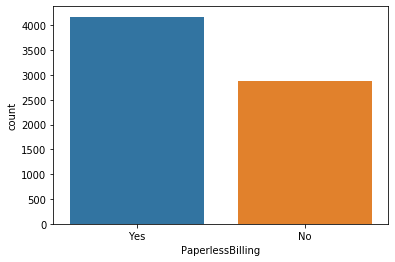

In [157]:
sns.countplot("PaperlessBilling", data=churn)

### From the above findings there is a high imbalence in  some columns like PaperlessBilling, PhoneService, Dependents and SeniorCitizen

### Performing Data Visualization to the multi_cols list in dataset to find the patterns present in the feature columns(Independent variables)

In [195]:
multi_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

#### Finding the counts of the MultipleLines column

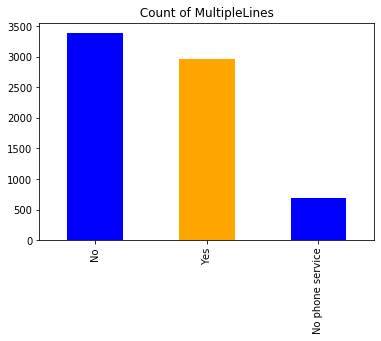

In [215]:
churn['MultipleLines'].value_counts().plot(kind='bar',title=' Count of MultipleLines ',color=['blue','orange'])

#### Finding the counts of the InternetService column

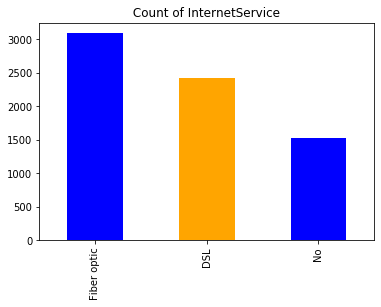

In [214]:
churn['InternetService'].value_counts().plot(kind='bar',title=' Count of InternetService ',color=['blue','orange'])

#### Finding the counts of the OnlineSecurity column

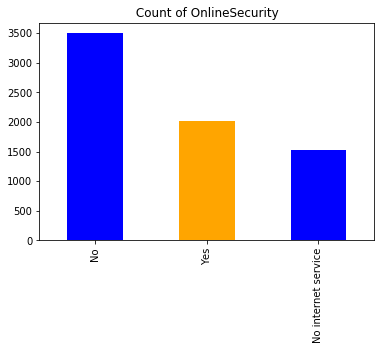

In [213]:
churn['OnlineSecurity'].value_counts().plot(kind='bar',title=' Count of OnlineSecurity ',color=['blue','orange'])

#### Finding the counts of the OnlineBackup column

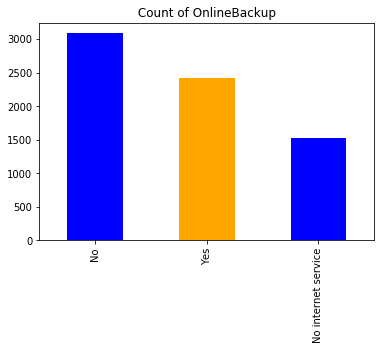

In [212]:
churn['OnlineBackup'].value_counts().plot(kind='bar',title=' Count of OnlineBackup ',color=['blue','orange'])

#### Finding the counts of the DeviceProtection column

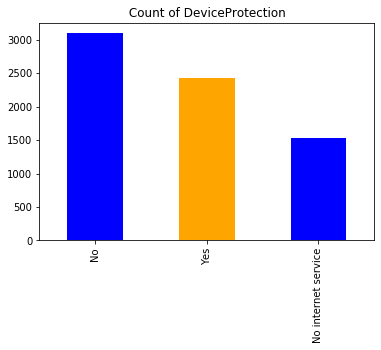

In [211]:
churn['DeviceProtection'].value_counts().plot(kind='bar',title=' Count of DeviceProtection ',color=['blue','orange'])

#### Finding the counts of the TechSupport column

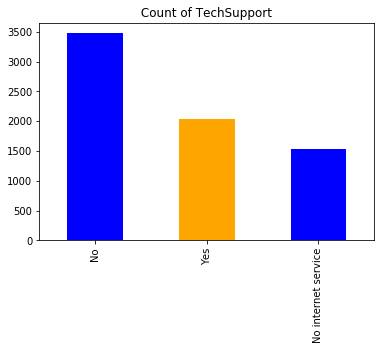

In [210]:
churn['TechSupport'].value_counts().plot(kind='bar',title=' Count of TechSupport ',color=['blue','orange'])

#### Finding the counts of the StreamingTV column

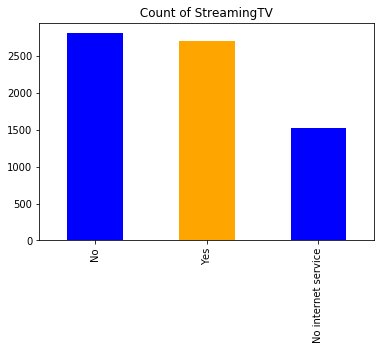

In [209]:
churn['StreamingTV'].value_counts().plot(kind='bar',title=' Count of StreamingTV ',color=['blue','orange'])

#### Finding the counts of the StreamingMovies column

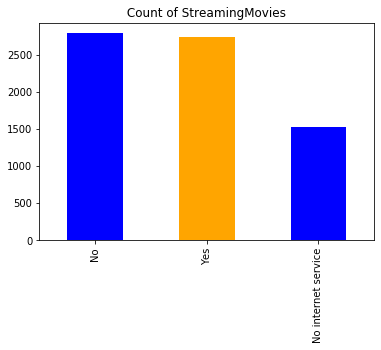

In [208]:
churn['StreamingMovies'].value_counts().plot(kind='bar',title=' Count of StreamingMovies ',color=['blue','orange'])

#### Finding the counts of the Contract column

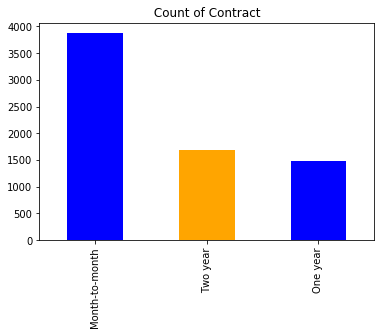

In [207]:
churn['Contract'].value_counts().plot(kind='bar',title=' Count of Contract ',color=['blue','orange'])

#### Finding the counts of the PaymentMethod column

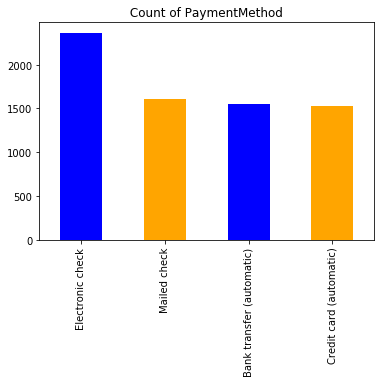

In [206]:
churn['PaymentMethod'].value_counts().plot(kind='bar',title=' Count of PaymentMethod ',color=['blue','orange'])

### Continuous Features

#### We left out some continuous features from dataframe for categorizing the categorical data and the multiple columns so let us look into the continuous features like Tenure and Monthly charges, we can omit the customer id Since it is not much important to find any information

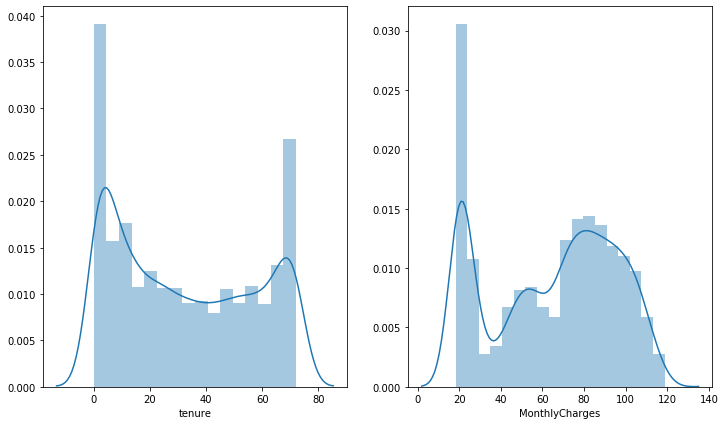

In [217]:
fig, axes = plt.subplots(1,2, figsize=(12, 7))
sns.distplot(churn["tenure"], ax=axes[0])
sns.distplot(churn["MonthlyCharges"], ax=axes[1])

### Implement Machine Learning Models

#### So according to  analysis, we can drop out some columns like Coustamer id ,gender, Phoneservice, Contract, totalcharges since there is no meaning to use these columns to the model since these columns have no information  these columns can not affect the dependent variable much

#### Dropping the columns which doesnt effect the dependent variable

In [219]:
churn.drop(['customerID','gender','PhoneService','Contract','TotalCharges'], axis=1, inplace=True)

In [220]:
churn

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,Churn_modified
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,No,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,No,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,Yes,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,No,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes,Mailed check,84.80,No,0
7039,0,Yes,Yes,72,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,Credit card (automatic),103.20,No,0
7040,0,Yes,Yes,11,No phone service,DSL,Yes,No,No,No,No,No,Yes,Electronic check,29.60,No,0
7041,1,Yes,No,4,Yes,Fiber optic,No,No,No,No,No,No,Yes,Mailed check,74.40,Yes,1


#### Importing modules

In [228]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler


### Preparing the Dependent and independent variables for Trianing model

In [230]:
cat_features = ['SeniorCitizen', 'Partner', 'Dependents',
'MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
X = pd.get_dummies(churn, columns=cat_features, drop_first=True)

In [232]:
sc = MinMaxScaler()
a = sc.fit_transform(churn[['tenure']])
b = sc.fit_transform(churn[['MonthlyCharges']])
X['tenure'] = a
X['MonthlyCharges'] = b

In [234]:
x = X.drop(['Churn','Churn_modified'], axis=1) #features (independent variables)
y = X['Churn'] #target (dependent variable)

In [235]:
x_test = X.drop('Churn',axis = 1)
y_test = X['Churn']

### Logistic Regression

In [263]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [264]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [265]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [266]:
predictions = model.predict(X_test)


### Model Evaluation

In [267]:
from sklearn.metrics import classification_report, confusion_matrix

In [268]:

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.85      0.91      0.88      1036
         Yes       0.70      0.57      0.63       373

    accuracy                           0.82      1409
   macro avg       0.78      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



### Confusion Matrix for Cherns  predictions

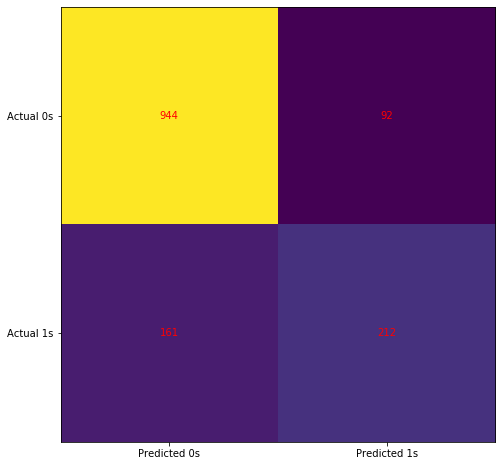

In [269]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib as plt

cm = confusion_matrix(y_test, predictions)



fig, ax = plt.pyplot.subplots(figsize=(8, 8))

ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

### Random Forest Classifier

In [287]:
from sklearn.ensemble import RandomForestClassifier

In [294]:
clf_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [295]:
pred = clf_forest.predict(X_train)


In [296]:
print(classification_report(y_train,pred))

              precision    recall  f1-score   support

          No       0.88      0.95      0.92      4138
         Yes       0.83      0.65      0.73      1496

    accuracy                           0.87      5634
   macro avg       0.86      0.80      0.82      5634
weighted avg       0.87      0.87      0.87      5634



### Support Vector Machine

In [276]:
from sklearn.svm import SVC 

model = SVC() 
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [279]:
svm_predictions = model.predict(X_test) 


In [280]:
print(classification_report(y_test,svm_predictions))

              precision    recall  f1-score   support

          No       0.84      0.93      0.88      1036
         Yes       0.71      0.51      0.60       373

    accuracy                           0.82      1409
   macro avg       0.78      0.72      0.74      1409
weighted avg       0.81      0.82      0.81      1409



### Grid Search for improving model

In [281]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [0.01], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   11.8s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.01],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [285]:
grid_predictions = grid.predict(X_test)

In [286]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

          No       0.85      0.92      0.88      1036
         Yes       0.71      0.55      0.62       373

    accuracy                           0.82      1409
   macro avg       0.78      0.73      0.75      1409
weighted avg       0.81      0.82      0.81      1409



### Final Conclusions

#### Since the dataset has n number of columns the findings of the importance of column may be bit difficult so classifing the columns into 3 catogories may get effective to work with. so splitting the columns into 3 classifications 
#### 1) catogorical columns 
#### These columns has only 2 catogories
#### 2) multiple columns 
#### These columns contains  catogories between 2 to 4
#### 3) continuous columns 
#### These columns has continuous type of columns


#### From the visualizations we get noticed that some column have high imbalence in the catogorical data and these type of columns may get effect to the churns

#### From the visualizations we get noticed that some column have very low potential to effect the Churns in the multi cols So we can dropout these columns for better model

#### From the overall visualizations we can know that some columns like Coustamer id ,gender, Phoneservice, Contract, totalcharges has less advantage to effect the churns and more advantage to effect the model. So these columns are dropped out for training the model

#### implementing Min Max Scalling leads to transform features  to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

#### After all the requiemnts the model is created with feature columns and dependent variable by splitting the data into training and testing modes